# Phishing website detection using decision trees and random forests

## Business Understanding

The objective of this document is to first build and evaluate a simple decision tree classifier capable of predicting whether a website is a legitimate- or phishing site based on a set of conditions. Later, the model is expanded to use a random forest classifier instead. 

Identifying phishing sites is a useful feature for browsers.

## Data Understanding

The dataset contains boolean flags of website and URL attributes as features, as well as a target column indicating whether a site is phishing or not.

## Data Preparation

In [120]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set

## Modeling the Decision Tree

In [122]:
decision_tree_model = DecisionTreeClassifier(max_depth=2, random_state=20)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=20)

Visualizing the tree:

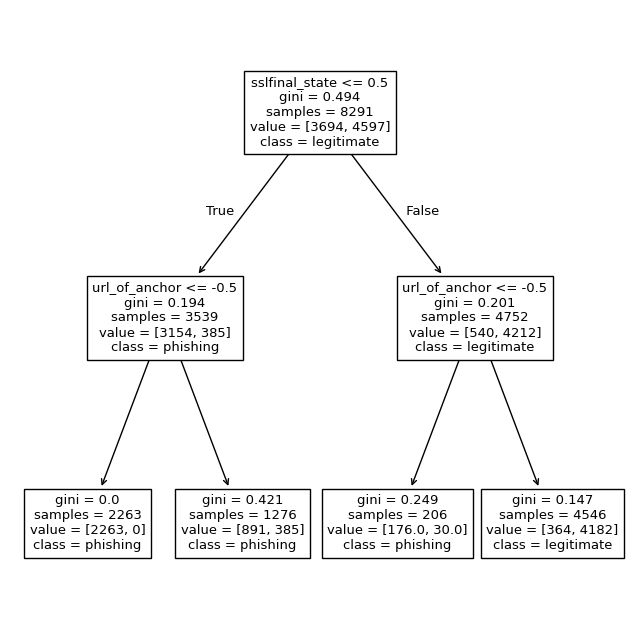

In [124]:
fig = plt.figure(figsize = (8, 8))
plot_tree(decision_tree_model, feature_names = X.keys(), class_names = ['phishing', 'legitimate'])
plt.show()

# Interpreting the Tree

If a websites SSL-handshake succeeds it is considered a legitimate site. Next condition for the legitimate group is to pass a check of number of URLs inside <a> anchor elements. A site is considered legitimate when there are less than 31% URLs in anchors, suspicious if anchors contain ≥31% and 67% URLs and above that is classified as a phishing site.

## Decision Tree Evaluation

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predictions
y_pred = decision_tree_model.predict(X_test)

# Accuracy
accuracy_test = accuracy_score(y_test, y_pred)

# Precision
precision_test = precision_score(y_test, y_pred, pos_label=-1)

# Recall
recall_test_2n = recall_score(y_test, y_pred, pos_label=-1)


In [126]:
results_df = pd.DataFrame({
    'Accuracy': [accuracy_test],
    'Precision': [precision_test],
    'Recall': [recall_test_2n],
})

results_df['Overall Score'] = results_df['Accuracy'] + results_df['Precision'] + results_df['Recall']


results_df

,Accuracy,Precision,Recall,Overall Score
0,0.907019,0.880933,0.909468,2.69742


Or more concisely:

In [127]:
from sklearn.metrics import classification_report

# Convert classification report to DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
-1,0.880933,0.909468,0.894973,1204.000000
1,0.928337,0.905128,0.916586,1560.000000
accuracy,0.907019,0.907019,0.907019,0.907019
macro avg,0.904635,0.907298,0.905779,2764.000000
weighted avg,0.907688,0.907019,0.907171,2764.000000


Confusion matrix:

In [128]:
from sklearn.metrics import confusion_matrix

preds = decision_tree_model.predict(X_test)
confusion_matrix(y_test, preds)

array([[1095,  109],
       [ 148, 1412]])

# Random Forest Expansion

In [129]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)
random_forest_model.fit(X, y)

C:\Users\D\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=0.75, max_samples=0.7, random_state=123)

## Random Forest Model Validation

In [130]:
from sklearn.model_selection import cross_val_score

# Carry out 10-fold cross-validation
cv_scores = cross_val_score(random_forest_model, X_test, y_test, cv=10)

# Show results
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

C:\Users\D\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\D\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\D\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\D\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column

Fold-specific accuracies: [0.94945848 0.93862816 0.94945848 0.94584838 0.95289855 0.94927536
 0.92753623 0.94927536 0.96376812 0.9384058 ]
Overall accuracy (avg. of folds): 0.9465


Display the confusion matrix and the classification report for random forest variant. One can clearly see that it has greater predictive power compared to the simple decision tree.

In [132]:
from sklearn.metrics import confusion_matrix

Y_pred = random_forest_model.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, Y_pred)}')
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

# Display the feature importances
print(random_forest_model.feature_importances_)

Confusion matrix:
[[1184   20]
 [  14 1546]]
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      1204
           1       0.99      0.99      0.99      1560

    accuracy                           0.99      2764
   macro avg       0.99      0.99      0.99      2764
weighted avg       0.99      0.99      0.99      2764

[0.00901373 0.00716265 0.00304055 0.00365304 0.00177938 0.02663888
 0.03202124 0.53157528 0.01145524 0.00250168 0.00129709 0.00402322
 0.01297331 0.18641823 0.03319888 0.01138809 0.00488518 0.00220885
 0.00433969 0.00243063 0.00120683 0.00331204 0.00169622 0.01266308
 0.00937782 0.03665995 0.00947457 0.01116088 0.01881349 0.00363029]
